# Final Project by Group 3

### Group Member: Zizhao Wang, Chuanting Zong, Xinyu Zou

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import so

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
ca_housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CA_housing_data.csv")

Mounted at /content/drive


<ipython-input-2-50506fd3bcf6>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ca_housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CA_housing_data.csv")


In [ ]:
ca_housing.head(5)

,Unnamed: 0,index,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,0,0,MLS Listing,NaN,Single Family Residential,898 Saint Jean Ct,Kenwood,CA,95452,1895000.0,...,Active,NaN,NaN,https://www.redfin.com/CA/Kenwood/898-St-Jean-...,BAREIS,323008219,N,Y,38.423663,-122.546226
1,1,1,MLS Listing,NaN,Vacant Land,1890 Lawndale Rd,Kenwood,CA,95452,749000.0,...,Active,NaN,NaN,https://www.redfin.com/CA/Kenwood/1890-Lawndal...,BAREIS,323008952,N,Y,38.407264,-122.572197
2,2,2,MLS Listing,NaN,Single Family Residential,9305 Clyde Ave,Kenwood,CA,95452,1299000.0,...,Active,NaN,NaN,https://www.redfin.com/CA/Kenwood/9305-Clyde-A...,BAREIS,323008201,N,Y,38.415200,-122.549272
3,3,3,MLS Listing,NaN,Single Family Residential,1335 Kinnybrook Dr,Kenwood,CA,95452,4350000.0,...,Active,NaN,NaN,https://www.redfin.com/CA/Kenwood/1335-Kinnybr...,BAREIS,322101941,N,Y,38.426317,-122.535020
4,4,4,MLS Listing,NaN,Single Family Residential,2700 Nelligan Rd,Glen Ellen,CA,95452,2995000.0,...,Active,NaN,NaN,https://www.redfin.com/CA/Kenwood/2700-Nelliga...,BAREIS,322073908,N,Y,38.413720,-122.545828


In [ ]:
ca_housing.describe()

,Unnamed: 0,index,SOLD DATE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,47116.000000,47116.000000,0.0,4.710300e+04,33983.000000,33347.000000,33086.000000,4.110400e+04,31642.000000,45451.000000,3.308600e+04,12339.000000,47085.000000,47085.000000
mean,23557.500000,59.250934,NaN,1.459580e+06,3.610452,3.510541,2425.450795,1.325999e+07,1977.756969,119.505973,1.212938e+03,514.054461,34.751742,-118.510022
std,13601.361978,70.669886,NaN,6.116573e+06,3.223399,96.889531,3439.643191,2.522417e+09,31.091486,200.771422,2.711093e+04,798.932007,1.518264,1.938378
min,0.000000,0.000000,NaN,1.000000e+00,0.000000,0.500000,1.000000,1.000000e+00,1776.000000,1.000000,3.000000e+00,0.000000,32.555579,-123.426265
25%,11778.750000,12.000000,NaN,2.980000e+05,2.000000,2.000000,1305.250000,6.098000e+03,1958.000000,18.000000,3.060000e+02,180.000000,33.808946,-118.808435
50%,23557.500000,31.000000,NaN,6.550000e+05,3.000000,2.500000,1824.000000,1.066400e+04,1980.000000,53.000000,4.800000e+02,337.000000,34.131992,-118.007671
75%,35336.250000,77.000000,NaN,1.300000e+06,4.000000,3.000000,2682.000000,8.363425e+04,2003.000000,149.000000,7.340000e+02,565.000000,35.051729,-117.198825
max,47115.000000,349.000000,NaN,1.000000e+09,100.000000,17680.000000,364162.000000,5.112162e+11,2024.000000,4590.000000,2.000000e+06,35315.000000,38.888113,-114.256344


In [ ]:
ca_housing.columns

Index(['Unnamed: 0', 'index', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE',
       'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE',
       'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
ca_housing.shape

(47116, 29)

In [ ]:
ca_housing.describe()

,Unnamed: 0,index,SOLD DATE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,47116.000000,47116.000000,0.0,4.710300e+04,33983.000000,33347.000000,33086.000000,4.110400e+04,31642.000000,45451.000000,3.308600e+04,12339.000000,47085.000000,47085.000000
mean,23557.500000,59.250934,NaN,1.459580e+06,3.610452,3.510541,2425.450795,1.325999e+07,1977.756969,119.505973,1.212938e+03,514.054461,34.751742,-118.510022
std,13601.361978,70.669886,NaN,6.116573e+06,3.223399,96.889531,3439.643191,2.522417e+09,31.091486,200.771422,2.711093e+04,798.932007,1.518264,1.938378
min,0.000000,0.000000,NaN,1.000000e+00,0.000000,0.500000,1.000000,1.000000e+00,1776.000000,1.000000,3.000000e+00,0.000000,32.555579,-123.426265
25%,11778.750000,12.000000,NaN,2.980000e+05,2.000000,2.000000,1305.250000,6.098000e+03,1958.000000,18.000000,3.060000e+02,180.000000,33.808946,-118.808435
50%,23557.500000,31.000000,NaN,6.550000e+05,3.000000,2.500000,1824.000000,1.066400e+04,1980.000000,53.000000,4.800000e+02,337.000000,34.131992,-118.007671
75%,35336.250000,77.000000,NaN,1.300000e+06,4.000000,3.000000,2682.000000,8.363425e+04,2003.000000,149.000000,7.340000e+02,565.000000,35.051729,-117.198825
max,47115.000000,349.000000,NaN,1.000000e+09,100.000000,17680.000000,364162.000000,5.112162e+11,2024.000000,4590.000000,2.000000e+06,35315.000000,38.888113,-114.256344


In [ ]:
correlation_matrix = ca_housing.corr()

# Display the correlation matrix
print(correlation_matrix)

                Unnamed: 0     index  SOLD DATE     PRICE      BEDS     BATHS  \
Unnamed: 0        1.000000  0.234494        NaN -0.038489 -0.079335 -0.006678   
index             0.234494  1.000000        NaN -0.040146 -0.047026 -0.004179   
SOLD DATE              NaN       NaN        NaN       NaN       NaN       NaN   
PRICE            -0.038489 -0.040146        NaN  1.000000  0.223901  0.012223   
BEDS             -0.079335 -0.047026        NaN  0.223901  1.000000  0.828270   
BATHS            -0.006678 -0.004179        NaN  0.012223  0.828270  1.000000   
SQUARE FEET      -0.052112  0.011826        NaN  0.417027  0.486398  0.031847   
LOT SIZE         -0.003416 -0.003427        NaN -0.000479 -0.003202 -0.000103   
YEAR BUILT        0.145230  0.121002        NaN  0.021578 -0.039558 -0.006051   
DAYS ON MARKET   -0.001445  0.371381        NaN -0.002906  0.041540 -0.000527   
$/SQUARE FEET    -0.006709 -0.004409        NaN  0.044720  0.037724  0.000913   
HOA/MONTH        -0.071539  

<ipython-input-222-16b400176407>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ca_housing.corr()


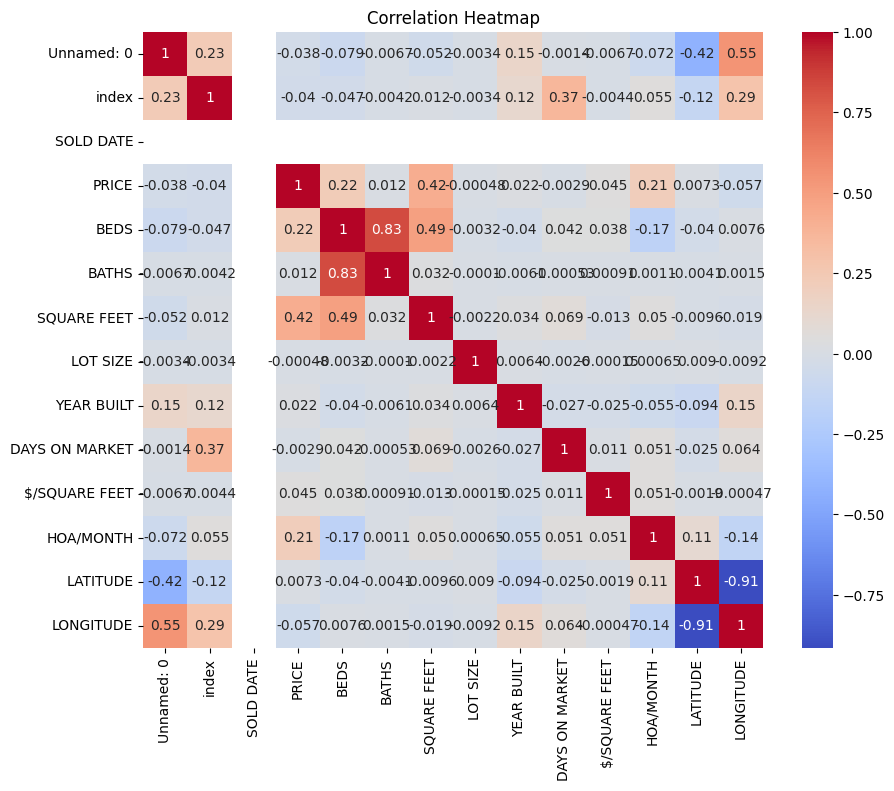

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Clean Data

In [ ]:
ca_housing.isnull().sum()

Unnamed: 0                                                                                         0
index                                                                                              0
SALE TYPE                                                                                          0
SOLD DATE                                                                                      47116
PROPERTY TYPE                                                                                      0
ADDRESS                                                                                          172
CITY                                                                                              54
STATE OR PROVINCE                                                                                  9
ZIP OR POSTAL CODE                                                                                31
PRICE                                                                                      

In [ ]:
ca_housing.shape

(47116, 29)

In [ ]:
# Check for Duplicate
duplicate_rows = ca_housing.duplicated()
print(ca_housing[duplicate_rows])

Empty DataFrame
Columns: [Unnamed: 0, index, SALE TYPE, SOLD DATE, PROPERTY TYPE, ADDRESS, CITY, STATE OR PROVINCE, ZIP OR POSTAL CODE, PRICE, BEDS, BATHS, LOCATION, SQUARE FEET, LOT SIZE, YEAR BUILT, DAYS ON MARKET, $/SQUARE FEET, HOA/MONTH, STATUS, NEXT OPEN HOUSE START TIME, NEXT OPEN HOUSE END TIME, URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING), SOURCE, MLS#, FAVORITE, INTERESTED, LATITUDE, LONGITUDE]
Index: []

[0 rows x 29 columns]


In [ ]:
# Check Outlier with IQR Method
Q1 = ca_housing.quantile(0.25)
Q3 = ca_housing.quantile(0.75)
IQR = Q3 - Q1

<ipython-input-227-5559ca9ed2e9>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = ca_housing.quantile(0.25)
<ipython-input-227-5559ca9ed2e9>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = ca_housing.quantile(0.75)


In [ ]:
# Drop Outlier with IQR Method
outliers = ((ca_housing < (Q1 - 1.5 * IQR)) | (ca_housing > (Q3 + 1.5 * IQR)))
ca_housing = ca_housing[~outliers.any(axis=1)]

<ipython-input-228-0903d149e723>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((ca_housing < (Q1 - 1.5 * IQR)) | (ca_housing > (Q3 + 1.5 * IQR)))


In [ ]:
ca_housing.shape

(24200, 29)

In [ ]:
ca_housing = ca_housing[ca_housing['SALE TYPE'] == 'MLS Listing']
ca_housing.shape

(22875, 29)

In [ ]:
# Define Features and Target
features = ca_housing[['BEDS', 'BATHS', 'CITY', 'SQUARE FEET', 'YEAR BUILT', 'DAYS ON MARKET', 'PROPERTY TYPE', 'LOT SIZE']]
target = ca_housing['PRICE']

In [ ]:
features = features.dropna()
features.shape

(15204, 8)

In [ ]:
index = features.index
target = target.loc[index]

In [ ]:
target = target.dropna()
target.shape

(15204,)

In [ ]:
features.describe()

,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,LOT SIZE
count,15204.000000,15204.000000,15204.000000,15204.000000,15204.000000,15204.000000
mean,3.255919,2.362914,1861.287819,1977.503289,58.174296,15924.999145
std,1.117018,0.812879,780.811973,28.885112,66.137134,27007.310186
min,0.000000,0.500000,170.000000,1892.000000,1.000000,1.000000
25%,3.000000,2.000000,1295.000000,1957.000000,11.000000,5227.000000
50%,3.000000,2.000000,1729.000000,1980.000000,34.000000,7249.500000
75%,4.000000,3.000000,2319.000000,2002.000000,77.250000,11326.000000
max,7.000000,4.500000,4743.000000,2024.000000,344.000000,199504.000000


In [ ]:
target.describe()

count    1.520400e+04
mean     8.328479e+05
std      5.186294e+05
min      6.200000e+03
25%      4.799990e+05
50%      6.950000e+05
75%      9.999990e+05
max      2.800888e+06
Name: PRICE, dtype: float64

## Datasets Visualization

<ipython-input-237-cebda8b81f9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_housing['SQUARE FEET BINS'] = pd.cut(ca_housing['SQUARE FEET'], bins=bins, labels=labels)


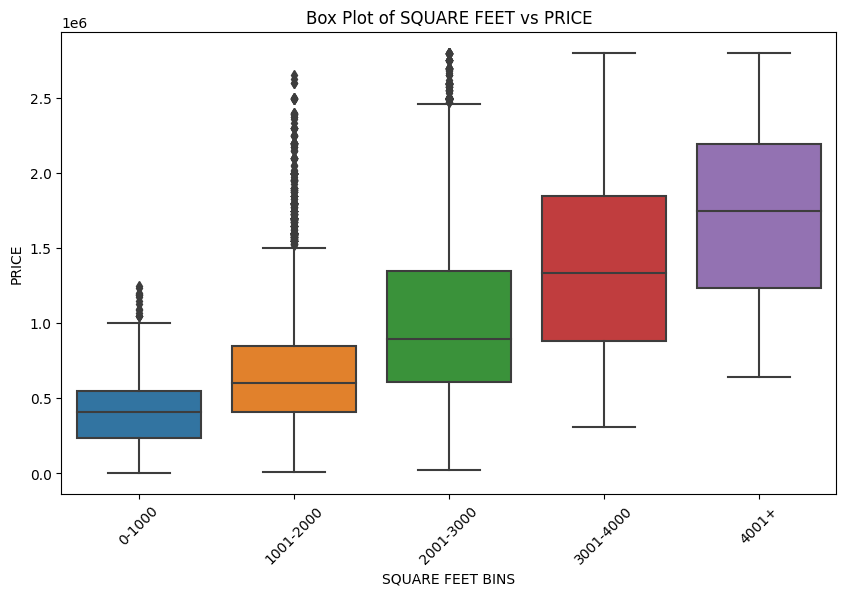

In [ ]:
# price & sqrt
bins = [0, 1000, 2000, 3000, 4000, float('inf')]
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001+']
ca_housing['SQUARE FEET BINS'] = pd.cut(ca_housing['SQUARE FEET'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ca_housing, x='SQUARE FEET BINS', y='PRICE')
plt.title("Box Plot of SQUARE FEET vs PRICE")
plt.xlabel("SQUARE FEET BINS")
plt.ylabel("PRICE")
plt.xticks(rotation=45)
plt.show()

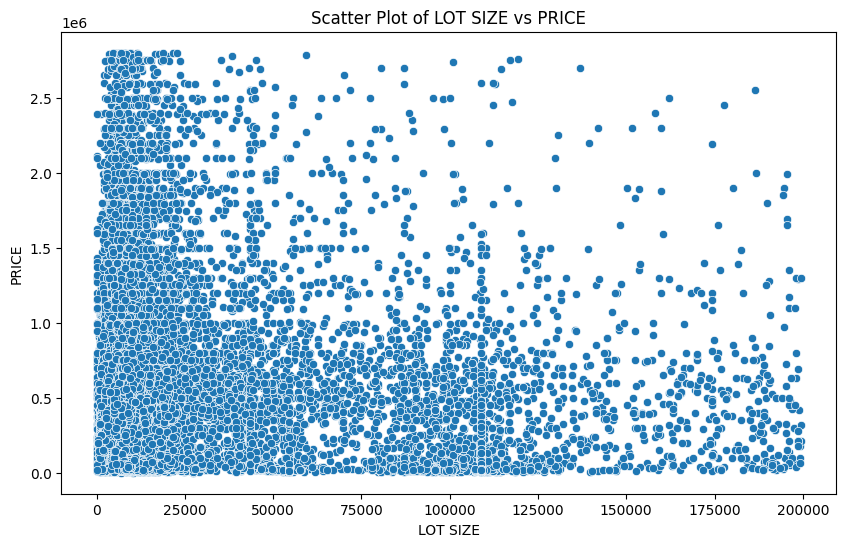

In [ ]:
# price & lot size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ca_housing, x='LOT SIZE', y='PRICE')
plt.title("Scatter Plot of LOT SIZE vs PRICE")
plt.xlabel("LOT SIZE")
plt.ylabel("PRICE")
plt.show()

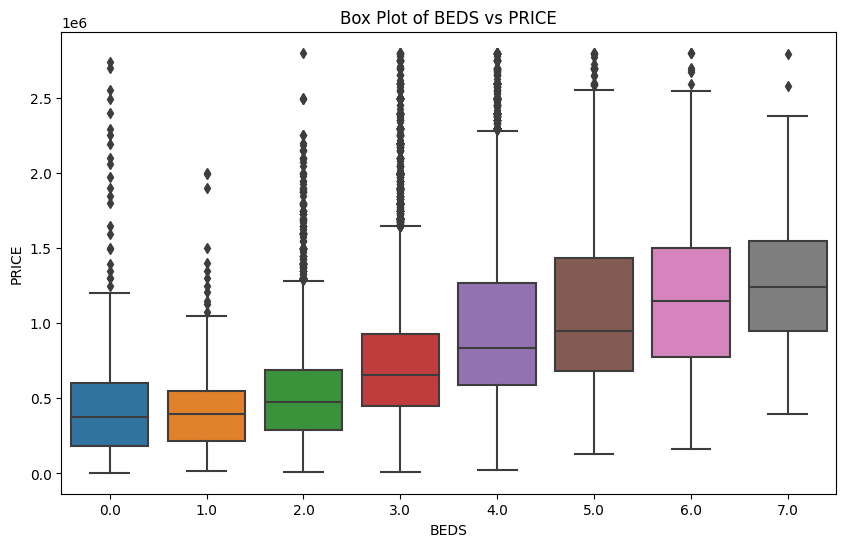

In [ ]:
# price & bed
plt.figure(figsize=(10, 6))
sns.boxplot(data=ca_housing, x='BEDS', y='PRICE')
plt.title("Box Plot of BEDS vs PRICE")
plt.xlabel("BEDS")
plt.ylabel("PRICE")
plt.show()

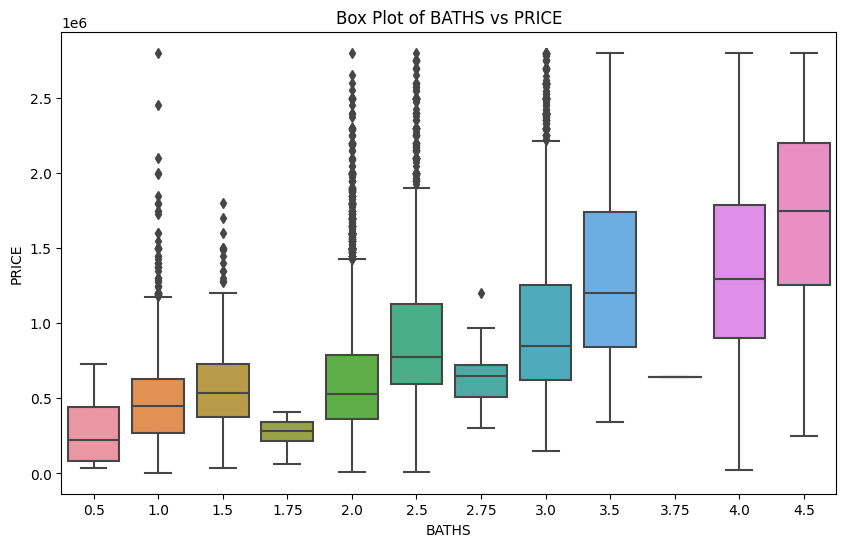

In [ ]:
# price & bath
plt.figure(figsize=(10, 6))
sns.boxplot(data=ca_housing, x='BATHS', y='PRICE')
plt.title("Box Plot of BATHS vs PRICE")
plt.xlabel("BATHS")
plt.ylabel("PRICE")
plt.show()

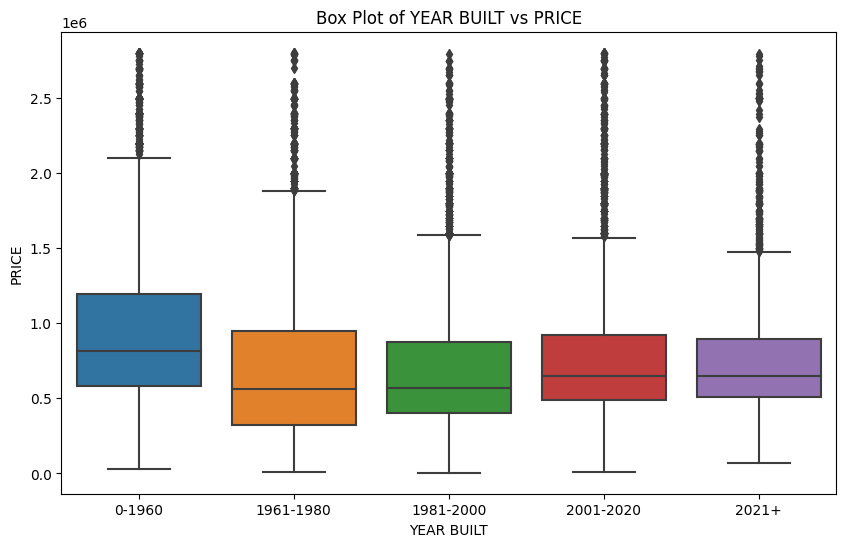

In [ ]:
# price & year built
bins = [0, 1960, 1980, 2000, 2020, float('inf')]
labels = ['0-1960', '1961-1980', '1981-2000', '2001-2020', '2021+']
ca_housing['YEAR BUILT'] = pd.cut(ca_housing['YEAR BUILT'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(data=ca_housing, x='YEAR BUILT', y='PRICE')
plt.title("Box Plot of YEAR BUILT vs PRICE")
plt.xlabel("YEAR BUILT")
plt.ylabel("PRICE")
plt.show()

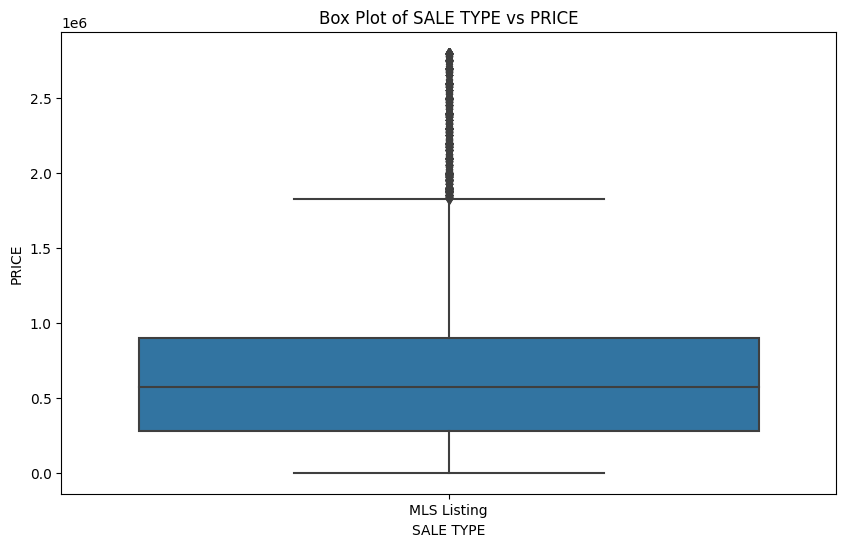

In [ ]:
# price & sale type
plt.figure(figsize=(10, 6))
sns.boxplot(data=ca_housing, x='SALE TYPE', y='PRICE')
plt.title("Box Plot of SALE TYPE vs PRICE")
plt.xlabel("SALE TYPE")
plt.ylabel("PRICE")
plt.show()

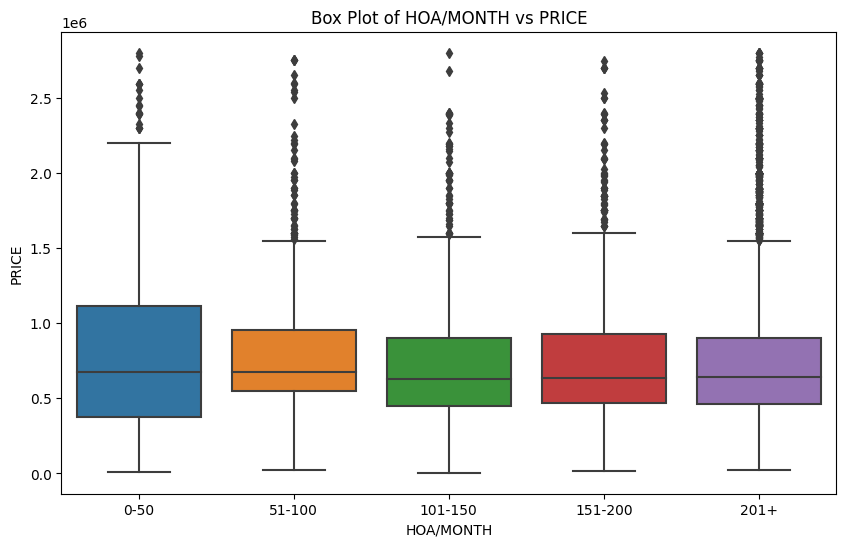

In [ ]:
# price & hoa
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201+']
ca_housing['HOA/MONTH'] = pd.cut(ca_housing['HOA/MONTH'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(data=ca_housing, x='HOA/MONTH', y='PRICE')
plt.title("Box Plot of HOA/MONTH vs PRICE")
plt.xlabel("HOA/MONTH")
plt.ylabel("PRICE")
plt.show()

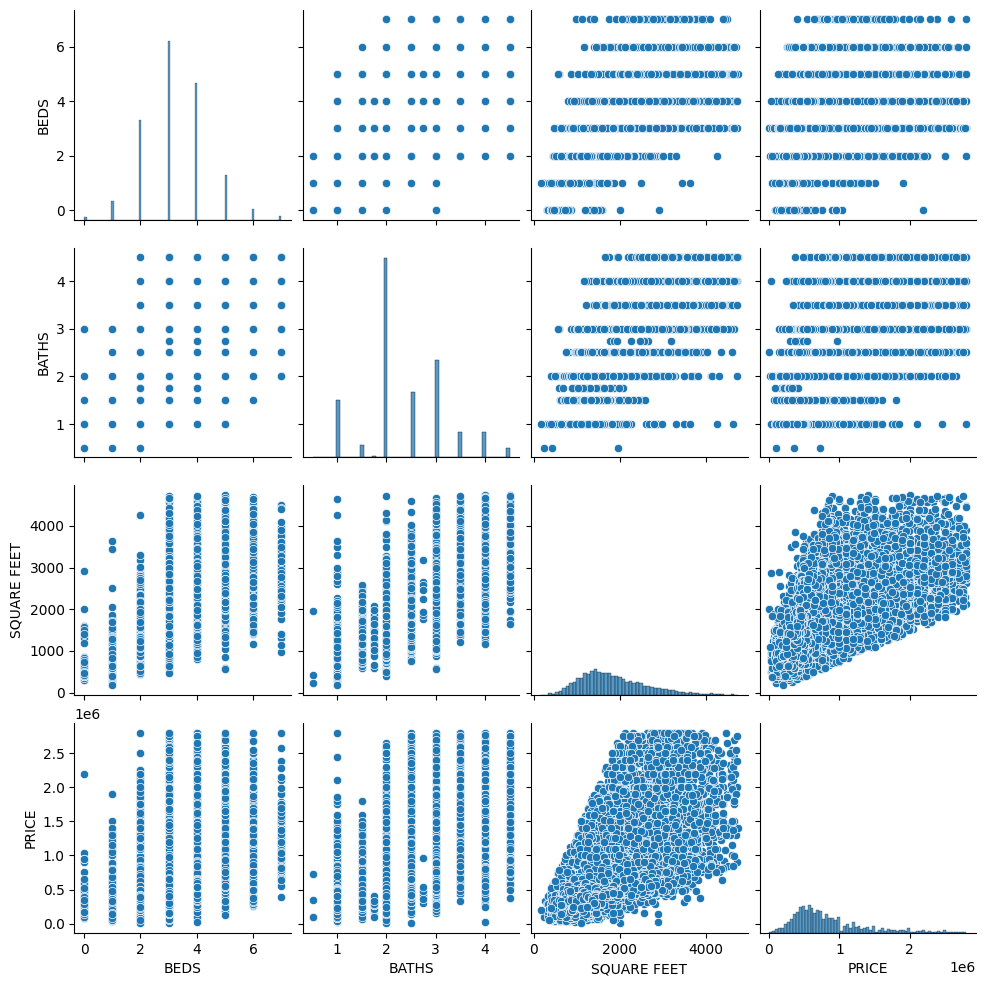

In [ ]:
sns.pairplot(housing, vars=['BEDS', 'BATHS', 'SQUARE FEET', 'PRICE'])
plt.show()

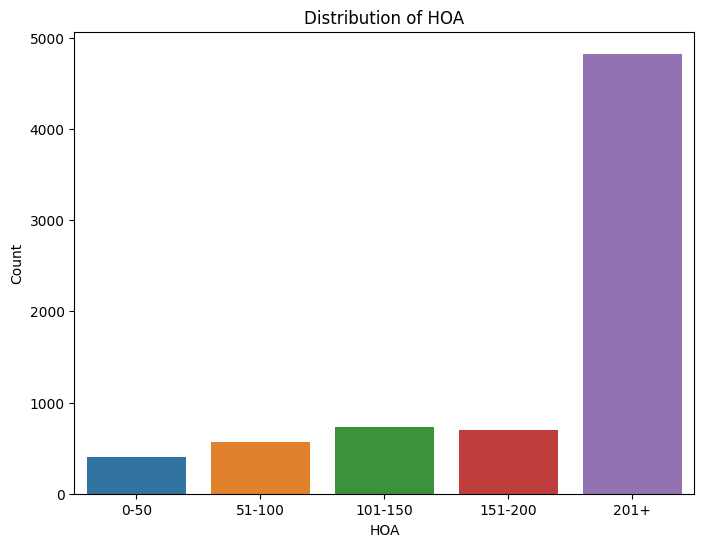

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ca_housing, x='HOA/MONTH')
plt.title("Distribution of HOA")
plt.xlabel("HOA")
plt.ylabel("Count")
plt.show()

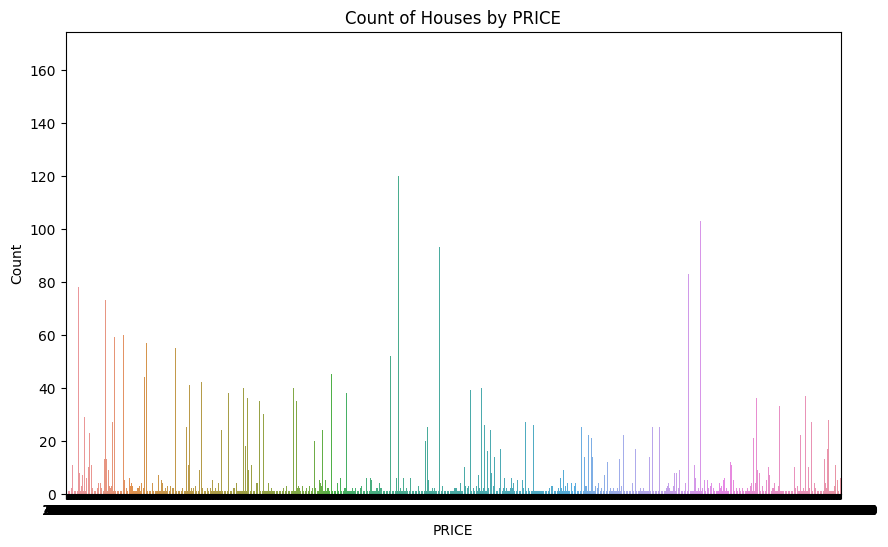

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ca_housing, x='PRICE')
plt.xlabel("PRICE")
plt.ylabel("Count")
plt.title("Count of Houses by PRICE")
plt.show()

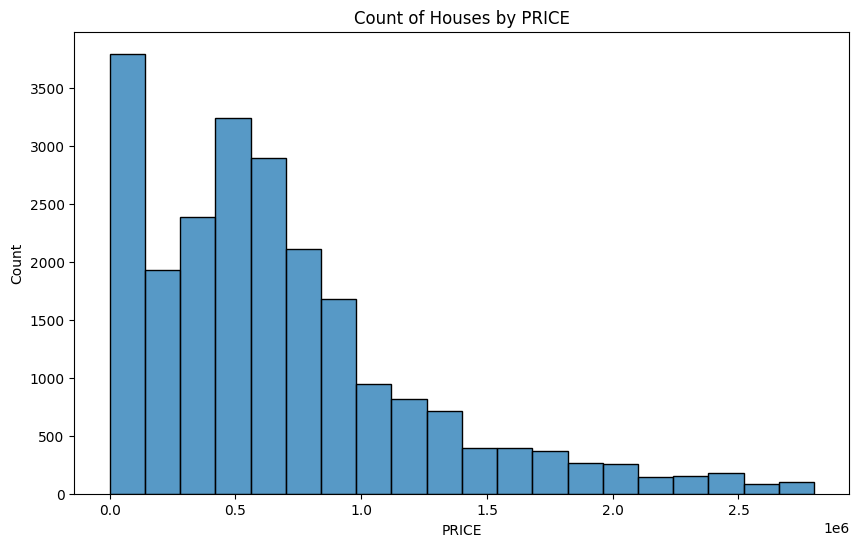

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ca_housing, x='PRICE', bins=20)
plt.xlabel("PRICE")
plt.ylabel("Count")
plt.title("Count of Houses by PRICE")
plt.show()

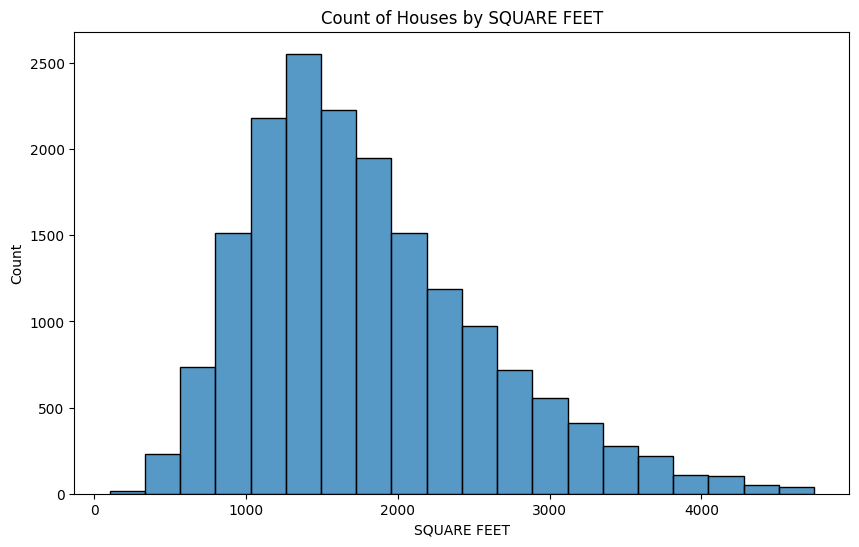

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ca_housing, x='SQUARE FEET', bins=20)
plt.xlabel("SQUARE FEET")
plt.ylabel("Count")
plt.title("Count of Houses by SQUARE FEET")
plt.show()

## Apply Model 1/baseline

In [ ]:
X1 = pd.get_dummies(features, columns=['PROPERTY TYPE', 'CITY'])
y1 = target

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
y1_pred = model1.predict(X1_test)

In [ ]:
mse1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 68290274437.84372


In [ ]:
score1 = r2_score(y1_test, y1_pred)
print("The score is:", score1)

The score is: 0.7464689530130446


## Apply Model 2 classification

In [ ]:
# Split the data into features (X) and the target variable (y)
# Define Features and Target

X2 = features
y2 = target

In [ ]:
X2

,BEDS,BATHS,CITY,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,PROPERTY TYPE,LOT SIZE
358,1.0,1.0,Onyx,624.0,1997.0,8.0,Single Family Residential,22651.0
359,3.0,2.0,Onyx,1770.0,1979.0,30.0,Mobile/Manufactured Home,16552.0
360,2.0,1.0,Onyx,990.0,1968.0,58.0,Single Family Residential,6534.0
361,2.0,2.5,Onyx,1717.0,1987.0,66.0,Single Family Residential,13939.0
365,2.0,1.5,Onyx,1640.0,1979.0,85.0,Single Family Residential,11761.0
...,...,...,...,...,...,...,...,...
46839,3.0,2.0,Lucerne Valley,1847.0,2006.0,43.0,Single Family Residential,108900.0
46852,2.0,1.0,Lucerne Valley,1098.0,1957.0,49.0,Single Family Residential,54450.0
46909,3.0,2.0,Lucerne Valley,1591.0,2006.0,109.0,Single Family Residential,185566.0
46914,3.0,2.0,Apple Valley,1848.0,1991.0,114.0,Mobile/Manufactured Home,183724.0


In [ ]:
y2

358       99000.0
359      219950.0
360      160000.0
361      228000.0
365      229900.0
           ...   
46839    450000.0
46852    235000.0
46909    399999.0
46914    159999.0
46919    244900.0
Name: PRICE, Length: 15204, dtype: float64

In [ ]:
#Train-Test Split : Split the data into training and testing sets to evaluate the model's performance.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing using ColumnTransformer and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define which columns are categorical and numerical

numeric_features = features[['BEDS', 'BATHS','SQUARE FEET','YEAR BUILT', 'DAYS ON MARKET','LOT SIZE']]
categorical_features = features[['PROPERTY TYPE','CITY']]


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))  # One-hot encode categorical features
])



In [ ]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Create the final pipeline with preprocessing and linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
X2_train

,BEDS,BATHS,CITY,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,PROPERTY TYPE,LOT SIZE
12768,3.0,1.0,Baldwin Park,923.0,1950.0,41.0,Single Family Residential,6604.0
43441,1.0,1.0,Palm Springs,568.0,1985.0,14.0,Condo/Co-op,871.0
34775,2.0,2.5,Phillips Ranch,1626.0,1997.0,103.0,Condo/Co-op,131805.0
30715,2.0,2.0,Dana Point,1010.0,1982.0,249.0,Condo/Co-op,10000.0
33461,5.0,2.0,Ventura,1304.0,1973.0,2.0,Single Family Residential,6098.0
...,...,...,...,...,...,...,...,...
21765,2.0,1.0,Los Angeles,942.0,1924.0,57.0,Single Family Residential,2658.0
41241,3.0,2.0,Joshua Tree,1784.0,2023.0,30.0,Single Family Residential,18096.0
22129,2.0,1.0,Los Angeles,1430.0,1913.0,1.0,Single Family Residential,6500.0
2707,4.0,2.0,Acton,1460.0,1984.0,99.0,Single Family Residential,9540.0


In [ ]:
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'YEAR BUILT', 'DAYS ON MARKET','LOT SIZE']
categorical_features = ['PROPERTY TYPE']


# Impute missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X2_train[numeric_features] = numeric_imputer.fit_transform(X2_train[numeric_features])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X2_train[categorical_features] = categorical_imputer.fit_transform(X2_train[categorical_features])

In [ ]:
#Drop NAN from y_train
y2_train = y2_train.dropna()

#Align x_train with y_train
X2_train = X2_train.reindex(y2_train.index)

In [ ]:
# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessor and regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BEDS', 'BATHS',
                                                   'SQUARE FEET', 'YEAR BUILT',
                                                   'DAYS ON MARKET',
                                                   'LOT SIZE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['PROPERTY TYPE'])])),
                ('regressor', LinearRegression())])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])



In [ ]:
y2_pred = pipeline.predict(X2_test)


In [ ]:
y2_test

1663     1130000.0
33357     675000.0
45609     350000.0
12496     725000.0
28130     499900.0
           ...    
28074     625000.0
13188     748888.0
40955     599000.0
40103     570000.0
38263     720000.0
Name: PRICE, Length: 3041, dtype: float64

I am trying to use classification metrics like accuracy on a regression problem, but Classification metrics can't handle a mix of multiclass and continuous target. To fix this issue, I use appropriate regression metrics instead.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred) #calculates the R-squared (R2) score, which measures the goodness of fit.

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 288724.0296255128
Mean Squared Error (MSE): 149157846278.70868
R-squared (R2): 0.44624406264789906


## Apply Model 3/neural network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
drive.mount('/content/drive')
ca_housing2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CA_housing_data.csv")
Q1 = ca_housing2.quantile(0.25)
Q3 = ca_housing2.quantile(0.75)
IQR = Q3 - Q1
outliers = ((ca_housing2 < (Q1 - 1.5 * IQR)) | (ca_housing2 > (Q3 + 1.5 * IQR)))
ca_housing2 = ca_housing2[~outliers.any(axis=1)]
ca_housing2 = ca_housing2[ca_housing2['SALE TYPE'] == 'MLS Listing']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-47-719fea45771f>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ca_housing2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CA_housing_data.csv")
<ipython-input-47-719fea45771f>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = ca_housing2.quantile(0.25)
<ipython-input-47-719fea45771f>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = ca_housing2.quantile(0.75)
<ipython-input-47-719fea45771f>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.alig

In [ ]:
features2 = [
    'BEDS', 'BATHS', 'CITY', 'SQUARE FEET',
    'YEAR BUILT', 'DAYS ON MARKET', 'PROPERTY TYPE', 'LOT SIZE', 'PRICE'
]

In [ ]:
housing = ca_housing2[features2]
housing = housing.dropna()
housing.shape

(15204, 9)

In [ ]:
housing

,BEDS,BATHS,CITY,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,PROPERTY TYPE,LOT SIZE,PRICE
358,1.0,1.0,Onyx,624.0,1997.0,8.0,Single Family Residential,22651.0,99000.0
359,3.0,2.0,Onyx,1770.0,1979.0,30.0,Mobile/Manufactured Home,16552.0,219950.0
360,2.0,1.0,Onyx,990.0,1968.0,58.0,Single Family Residential,6534.0,160000.0
361,2.0,2.5,Onyx,1717.0,1987.0,66.0,Single Family Residential,13939.0,228000.0
365,2.0,1.5,Onyx,1640.0,1979.0,85.0,Single Family Residential,11761.0,229900.0
...,...,...,...,...,...,...,...,...,...
46839,3.0,2.0,Lucerne Valley,1847.0,2006.0,43.0,Single Family Residential,108900.0,450000.0
46852,2.0,1.0,Lucerne Valley,1098.0,1957.0,49.0,Single Family Residential,54450.0,235000.0
46909,3.0,2.0,Lucerne Valley,1591.0,2006.0,109.0,Single Family Residential,185566.0,399999.0
46914,3.0,2.0,Apple Valley,1848.0,1991.0,114.0,Mobile/Manufactured Home,183724.0,159999.0


In [ ]:
housing_n = pd.get_dummies(housing, columns=['PROPERTY TYPE','CITY'])

In [ ]:
Xn = housing_n.drop('PRICE', axis=1)
yn = housing_n['PRICE']

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
Xn_train_scaled = scaler.fit_transform(Xn_train)
Xn_test_scaled = scaler.transform(Xn_test)

Model 1

In [ ]:
modeln = keras.Sequential()
modeln.add(layers.Input(shape=(Xn_train_scaled.shape[1],)))
modeln.add(layers.Dense(64, activation='relu'))
modeln.add(layers.Dense(32, activation='relu'))
modeln.add(layers.Dense(1))  # Output layer for regression
modeln.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
historyn = modeln.fit(Xn_train_scaled, yn_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
343/343 [==============================] - 2s 3ms/step - loss: 965427986432.0000 - val_loss: 947442155520.0000
Epoch 2/50
343/343 [==============================] - 1s 2ms/step - loss: 950403334144.0000 - val_loss: 916720123904.0000
Epoch 3/50
343/343 [==============================] - 1s 3ms/step - loss: 895542362112.0000 - val_loss: 837139038208.0000
Epoch 4/50
343/343 [==============================] - 2s 5ms/step - loss: 789982412800.0000 - val_loss: 710948028416.0000
Epoch 5/50
343/343 [==============================] - 2s 4ms/step - loss: 645647695872.0000 - val_loss: 559145484288.0000
Epoch 6/50
343/343 [==============================] - 2s 7ms/step - loss: 490720034816.0000 - val_loss: 415882182656.0000
Epoch 7/50
343/343 [==============================] - 3s 9ms/step - loss: 357310464000.0000 - val_loss: 308266237952.0000
Epoch 8/50
343/343 [==============================] - 2s 5ms/step - loss: 265135308800.0000 - val_loss: 244500676608.0000
Epoch 9/50
343/343 [====

In [ ]:
modeln.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                30208     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 32,321
Trainable params: 32,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = modeln.evaluate(Xn_test, yn_test, verbose=0)
print("Test loss:", score)

Test loss: 5.0801269001274e+18


In [ ]:
from sklearn.metrics import r2_score

yn_pred = modeln.predict(Xn_test_scaled)
r2 = r2_score(yn_test, yn_pred)

print("R-squared (R2) Score:", r2)

96/96 [==============================] - 0s 1ms/step
R-squared (R2) Score: 0.6909310907009244


Model 2

In [ ]:
modeln2 = keras.Sequential()
modeln2.add(layers.Input(shape=(Xn_train_scaled.shape[1],)))
modeln2.add(layers.Dense(128, activation='relu'))
modeln2.add(layers.Dense(128, activation='relu'))
modeln2.add(layers.Dense(64, activation='relu'))
modeln2.add(layers.Dense(1))  # Output layer for regression
modeln2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
historyn2 = modeln2.fit(Xn_train_scaled, yn_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
343/343 [==============================] - 2s 4ms/step - loss: 786041733120.0000 - val_loss: 281134923776.0000
Epoch 2/50
343/343 [==============================] - 1s 4ms/step - loss: 198902513664.0000 - val_loss: 171026956288.0000
Epoch 3/50
343/343 [==============================] - 2s 5ms/step - loss: 141725564928.0000 - val_loss: 139845451776.0000
Epoch 4/50
343/343 [==============================] - 2s 5ms/step - loss: 121741697024.0000 - val_loss: 127892742144.0000
Epoch 5/50
343/343 [==============================] - 1s 4ms/step - loss: 112007946240.0000 - val_loss: 121310576640.0000
Epoch 6/50
343/343 [==============================] - 1s 3ms/step - loss: 105521905664.0000 - val_loss: 116190355456.0000
Epoch 7/50
343/343 [==============================] - 1s 3ms/step - loss: 100029358080.0000 - val_loss: 111912017920.0000
Epoch 8/50
343/343 [==============================] - 1s 3ms/step - loss: 95105277952.0000 - val_loss: 107238817792.0000
Epoch 9/50
343/343 [=====

In [ ]:
score = modeln2.evaluate(Xn_test, yn_test, verbose=0)
print("Test loss:", score)
yn2_pred = modeln2.predict(Xn_test_scaled)
r2 = r2_score(yn_test, yn2_pred)

print("R-squared (R2) Score:", r2)

Test loss: 2.3577217061517e+19
96/96 [==============================] - 0s 2ms/step
R-squared (R2) Score: 0.7956027220999323


Model 3

In [ ]:
modeln3 = keras.Sequential()
modeln3.add(layers.Input(shape=(Xn_train_scaled.shape[1],)))
modeln3.add(layers.Dense(256, activation='relu'))
modeln3.add(layers.Dense(128, activation='relu'))
modeln3.add(layers.Dense(64, activation='relu'))
modeln3.add(layers.Dense(1))  # Output layer for regression
modeln3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
historyn3 = modeln3.fit(Xn_train_scaled, yn_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
343/343 [==============================] - 6s 8ms/step - loss: 734675795968.0000 - val_loss: 251312635904.0000
Epoch 2/50
343/343 [==============================] - 3s 8ms/step - loss: 185439059968.0000 - val_loss: 166633979904.0000
Epoch 3/50
343/343 [==============================] - 3s 8ms/step - loss: 137341665280.0000 - val_loss: 138711203840.0000
Epoch 4/50
343/343 [==============================] - 3s 8ms/step - loss: 120181751808.0000 - val_loss: 126691262464.0000
Epoch 5/50
343/343 [==============================] - 3s 9ms/step - loss: 110830247936.0000 - val_loss: 118878527488.0000
Epoch 6/50
343/343 [==============================] - 3s 8ms/step - loss: 104166776832.0000 - val_loss: 114551775232.0000
Epoch 7/50
343/343 [==============================] - 2s 5ms/step - loss: 98913271808.0000 - val_loss: 110103027712.0000
Epoch 8/50
343/343 [==============================] - 2s 5ms/step - loss: 94225817600.0000 - val_loss: 106277683200.0000
Epoch 9/50
343/343 [======

In [ ]:
score = modeln3.evaluate(Xn_test, yn_test, verbose=0)
print("Test loss:", score)
yn3_pred = modeln3.predict(Xn_test_scaled)
r2 = r2_score(yn_test, yn3_pred)

print("R-squared (R2) Score:", r2)

Test loss: 2.531953397321643e+19
96/96 [==============================] - 0s 2ms/step
R-squared (R2) Score: 0.7997678612768682


Lasso

In [ ]:
from math import log, sqrt
from sklearn.linear_model import Lasso

In [ ]:
features2 = [
    'BEDS', 'BATHS', 'CITY', 'SQUARE FEET',
    'YEAR BUILT', 'DAYS ON MARKET', 'PROPERTY TYPE', 'LOT SIZE', 'PRICE'
]
housing = ca_housing2[features2]
housing = housing.dropna()
housing.shape
housing_n = pd.get_dummies(housing, columns=['PROPERTY TYPE','CITY'])

In [ ]:
Xl = housing_n.drop('PRICE', axis=1)
yl = housing_n['PRICE']

In [ ]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha = 100,max_iter = 30000))

In [ ]:
lasso = pipe_lasso.fit(Xl_train, yl_train)

In [ ]:
print("Test set score: {:.2f}".format(lasso.score(Xl_test, yl_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'lasso__alpha': np.logspace(1, 7, num = 13),
             'lasso__max_iter': [10000]}

In [ ]:
grid = GridSearchCV(pipe_lasso, param_grid = param_grid, cv = 10, n_jobs = -1)

In [ ]:
grid.fit(Xl_train, yl_train)

In [ ]:
print("Score for the best model: {:.2f}".format(grid.score(Xl_test, yl_test)))

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Xg = housing_n.drop('PRICE', axis=1)
yg = housing_n['PRICE']

In [ ]:
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
Xg_train_scaled = scaler.fit_transform(Xg_train)
Xg_test_scaled = scaler.transform(Xg_test)

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(Xg_train_scaled, yg_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
yg_pred = gb_regressor.predict(Xg_test_scaled)

r2 = r2_score(yg_test, yg_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.5977831289391895
